<a href="https://colab.research.google.com/github/OGSUPRA/proga/blob/master/Pandas_1_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B3%D0%BE_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_Ultra_Pro_%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%98%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%98%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas часть 1. Разбор Домашнего Задания. Ultra-Pro

*2 балла за каждую задачу*

In [ ]:
import pandas as pd #Импортируем pandas
import os #Импортируем для работы с файловой системой

Представим ситуацию: Вы заказали базу у фрилансеров. Им необходимо было скачать с сайтов двух отелей анонимную базу данных обо всех клиентах. Фрилансеры выполнили заказ и прислали работу. Как оказалось, исходные данные очень загрязнены (пустыми колонками, неинформативными строками и т. д.), да еще и представлены в виде нескольких различных файлов. Главная задача на всё ДЗ - очистить базу и сохранить в виде одного документа.

Ссылка на файлы:
https://drive.google.com/drive/folders/12aykvz02214Q_7eNMm3loXzOIDXfeZ4b?usp=sharing

Лучше сохранить на свой Google Диск

### Задание 1
*(2 балла)*


Подключите Google Drive.

Откройте папку с файлами и сохраните каждый из них в виде Pandas DataFrame.

**Подсказка 1**: получить список имен файлов можно при помощи библиотеки os, командой os.listdir (путь к папке с файлами).

**Подсказка 2**: для сохранения всех файлов в виде Pandas DataFrame удобно использовать одну из структур данных Python.

Объедините все Pandas DataFrame в один.

**Решение:**

In [ ]:
#Подключаем Google Диск
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dfs = [] #Создаем список для всех DataFrame
for i in os.listdir('/content/drive/My Drive/Базы/bookings/'): #Проходим по каждому файлу в папке
  print('Добавляем файл: ', i) #Выводим информацию о текущем файле
  dfs.append(pd.read_csv('/content/drive/My Drive/Базы/bookings/' + str(i))) #Читаем файл и добавляем в список


Добавляем файл:  data1.csv
Добавляем файл:  data2.csv
Добавляем файл:  data3.csv
Добавляем файл:  data4.csv
Добавляем файл:  data5.csv
Добавляем файл:  data6.csv
Добавляем файл:  data7.csv
Добавляем файл:  data8.csv
Добавляем файл:  data9.csv
Добавляем файл:  data10.csv


In [ ]:
df = pd.concat(dfs) #Объединяем все DataFrame в один

In [ ]:
df #Смотрим результат

,Unnamed: 0,test_values,Unnamed: 2,for_notes,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,NaN,NaN,NaN,Resort Hotel,0.0,342.0,2015.0,July,NaN,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,1,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,Resort Hotel,0.0,7.0,2015.0,July,NaN,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,3,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,Resort Hotel,0.0,14.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,238775,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23874,238776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23875,238777,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23876,238778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 2
*(2 балла)*

Хорошо бы понимать, с какими данными мы работаем.

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Проверьте, выведя график, есть ли пропуски в данных. Оцените, насколько их много.

**Решение:**

In [ ]:
print('Число строк: ', df.shape[0])
print('Число столбцов: ', df.shape[1])

Число строк:  238780
Число столбцов:  37


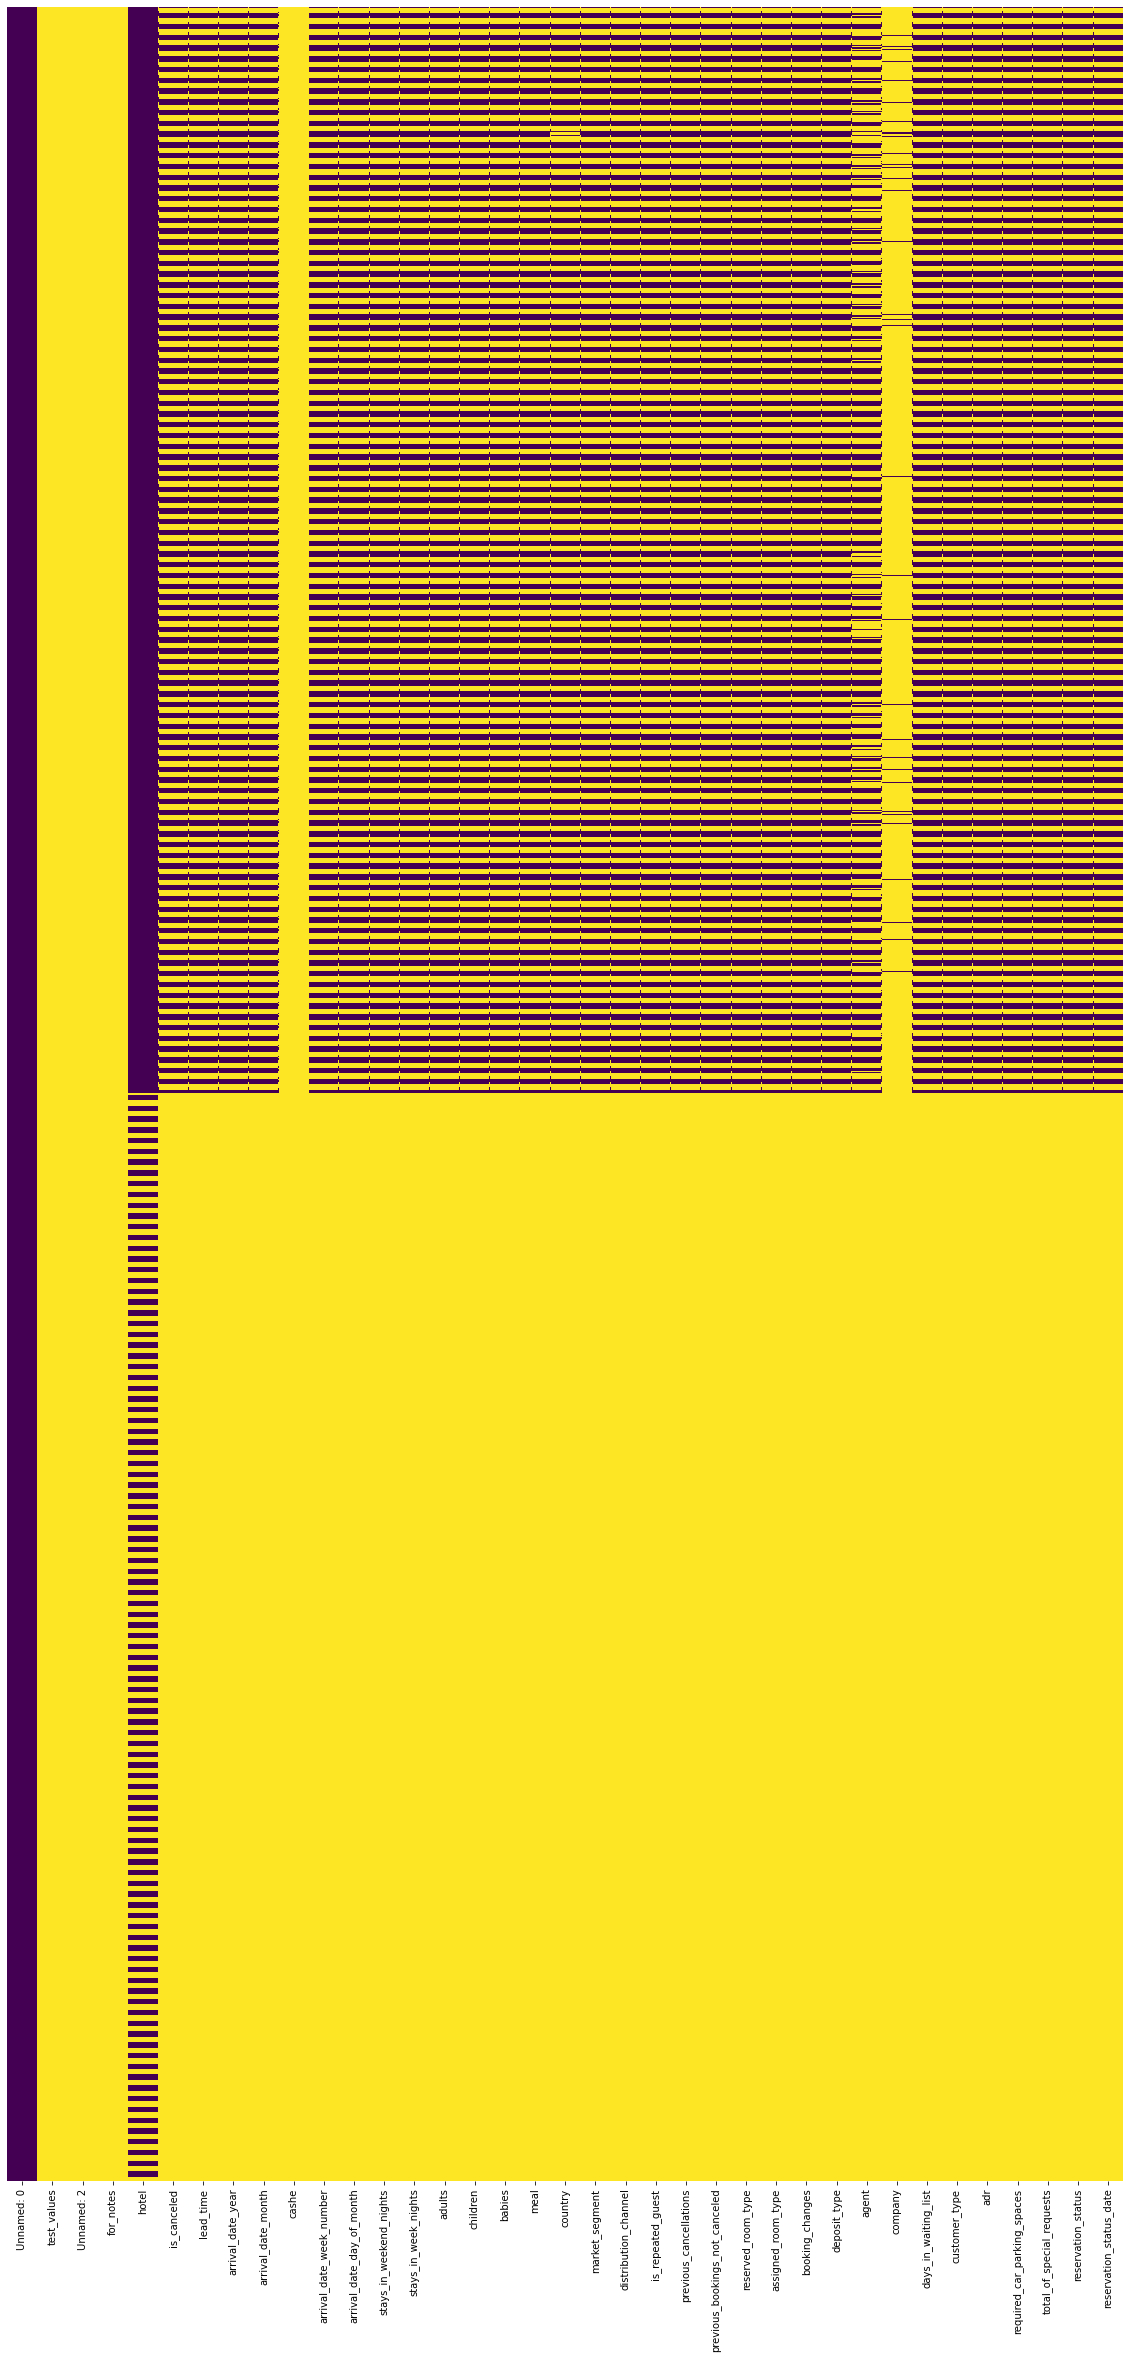

In [ ]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,40)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем пропуски
plt.show() # Отображаем график

### Задание 3
*(2 балла)*

Основываясь на выводах из предыдущего задания, очистите данные от пропусков.

**Подсказка**: очевидно, что есть полностью пустые столбцы, неинформативные строки с одним лишь значением "For notes:", пустая часть датасета внизу. После этих преобразований могут остаться пустые значения в датасете с хаотичным расположением (это допускается).

Если остались пропуски, заполните их словом "unknown".

**Решение:**

In [ ]:
df = df[df.columns[4:]] #Оставляем в исходном датасете все столбцы после первых четырех

In [ ]:
df #Смотрим результат

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23875,For notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[::2] #Берем каждую вторую строку

In [ ]:
df #Смотрим результат

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0.0,0.0,2015.0,July,NaN,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0.0,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
8,Resort Hotel,1.0,85.0,2015.0,July,NaN,27.0,1.0,0.0,3.0,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis=0, how='all') #Удаляем строки, если в них все записи пустые
df = df.dropna(axis=1, how='all') #Удаляем столбцы, если в них все записи пустые

In [ ]:
df #Смотрим результат

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0.0,0.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0.0,No Deposit,NaN,NaN,0.0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03
8,Resort Hotel,1.0,85.0,2015.0,July,27.0,1.0,0.0,3.0,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,82.00,0.0,1.0,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,City Hotel,0.0,44.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,0.0,0.0,SC,DEU,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,9.0,NaN,0.0,Transient,140.75,0.0,1.0,Check-Out,2017-09-04
23870,City Hotel,0.0,135.0,2017.0,August,35.0,30.0,2.0,4.0,3.0,0.0,0.0,BB,JPN,Online TA,TA/TO,0.0,0.0,0.0,G,G,0.0,No Deposit,7.0,NaN,0.0,Transient,209.00,0.0,0.0,Check-Out,2017-09-05
23872,City Hotel,0.0,21.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,0.0,0.0,BB,BEL,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,No Deposit,394.0,NaN,0.0,Transient,96.14,0.0,2.0,Check-Out,2017-09-06
23874,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,0.0,0.0,BB,FRA,Online TA,TA/TO,0.0,0.0,0.0,E,E,0.0,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-09-07


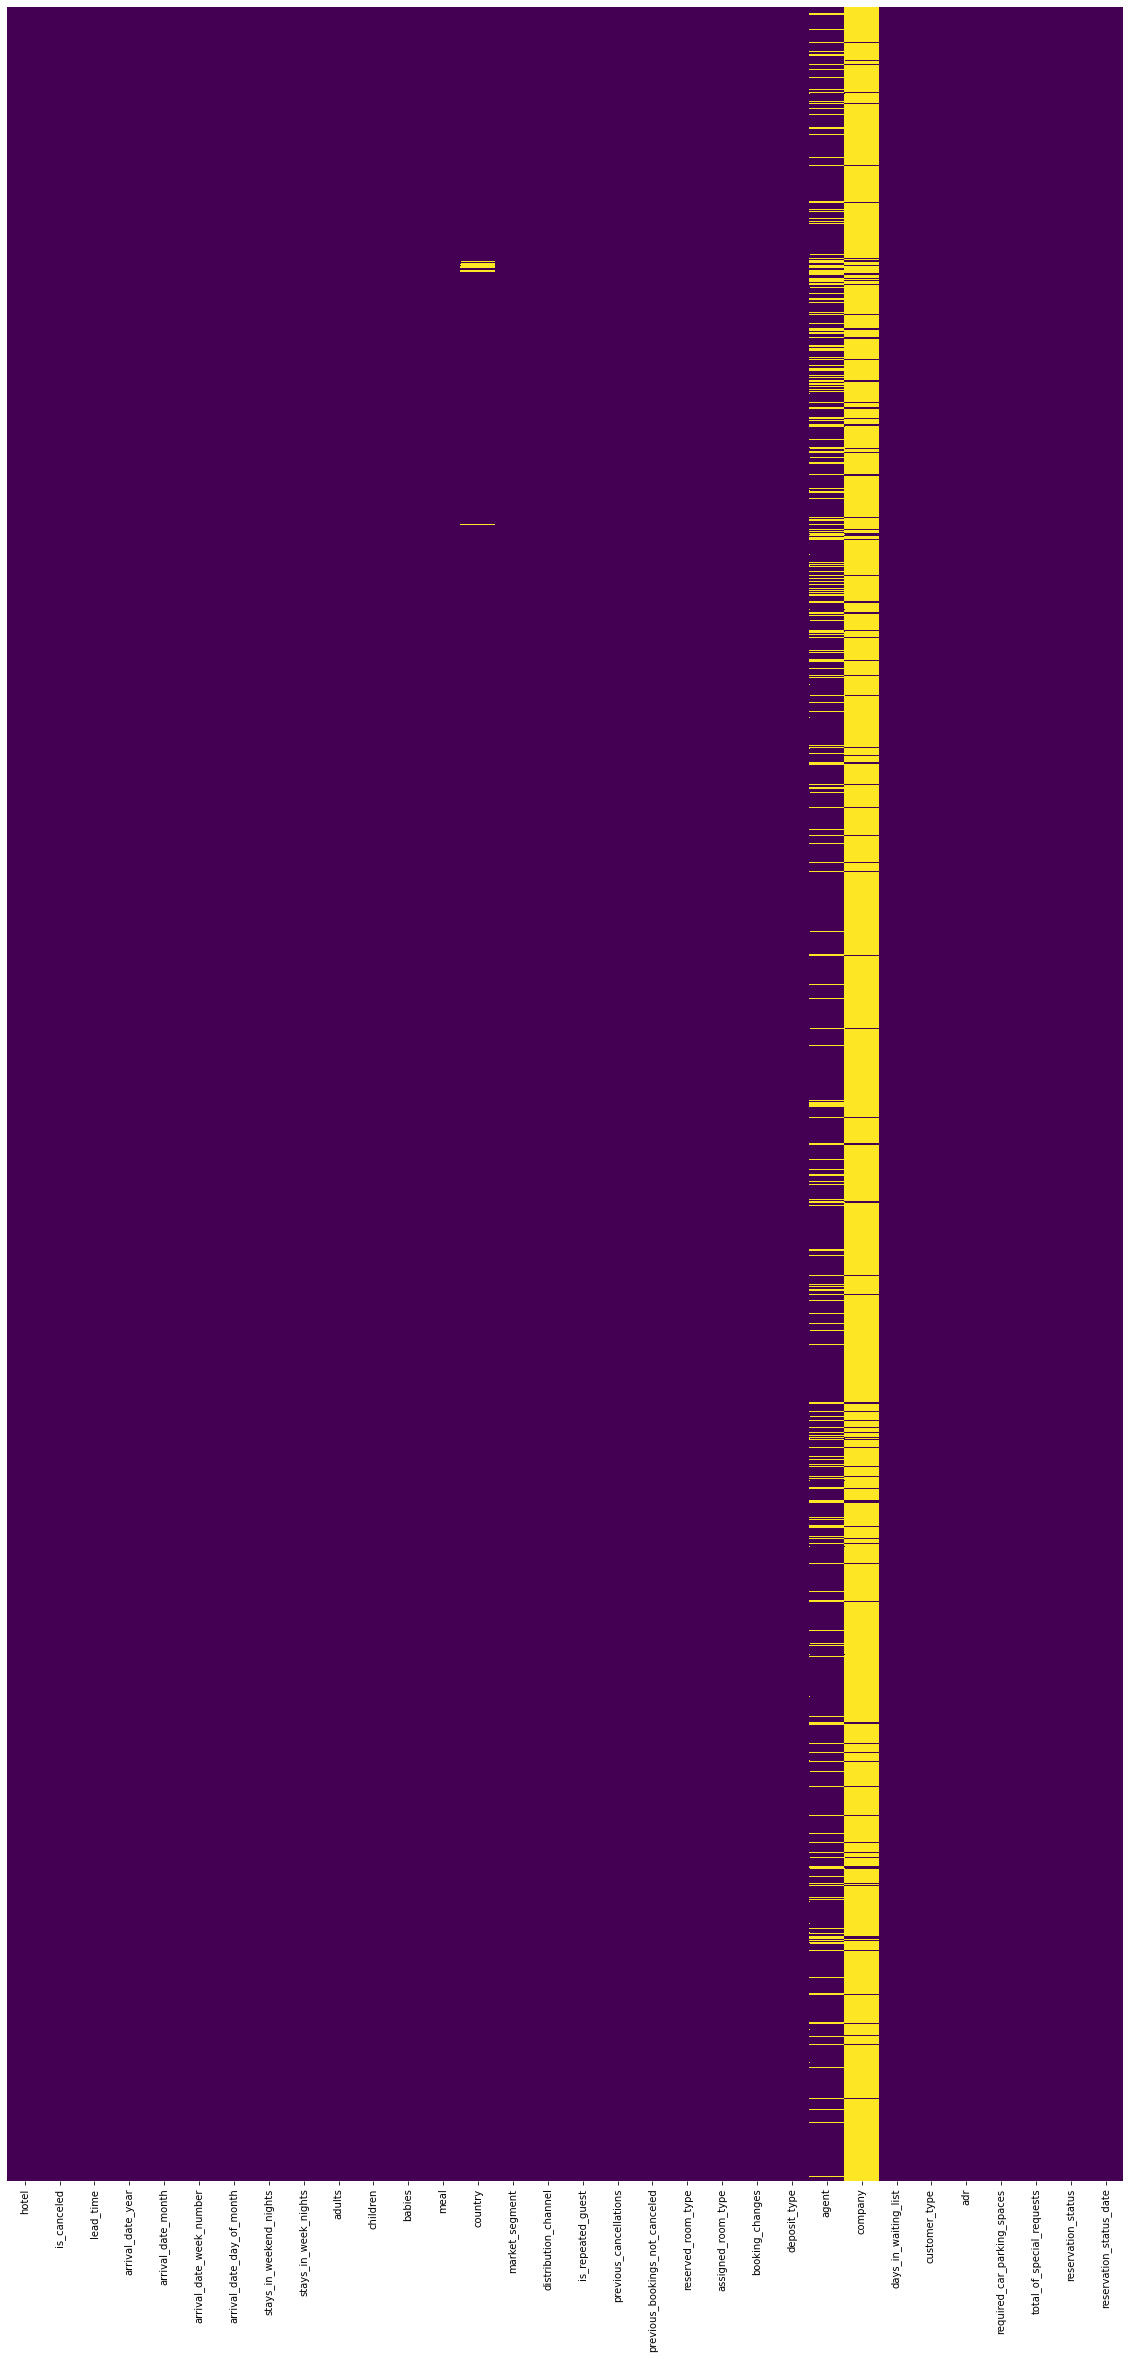

In [ ]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,40)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем пропуски
plt.show() # Отображаем график

In [ ]:
df = df.fillna('unknown') #Заполняем все оставшиеся пустые значения словом "unknown"

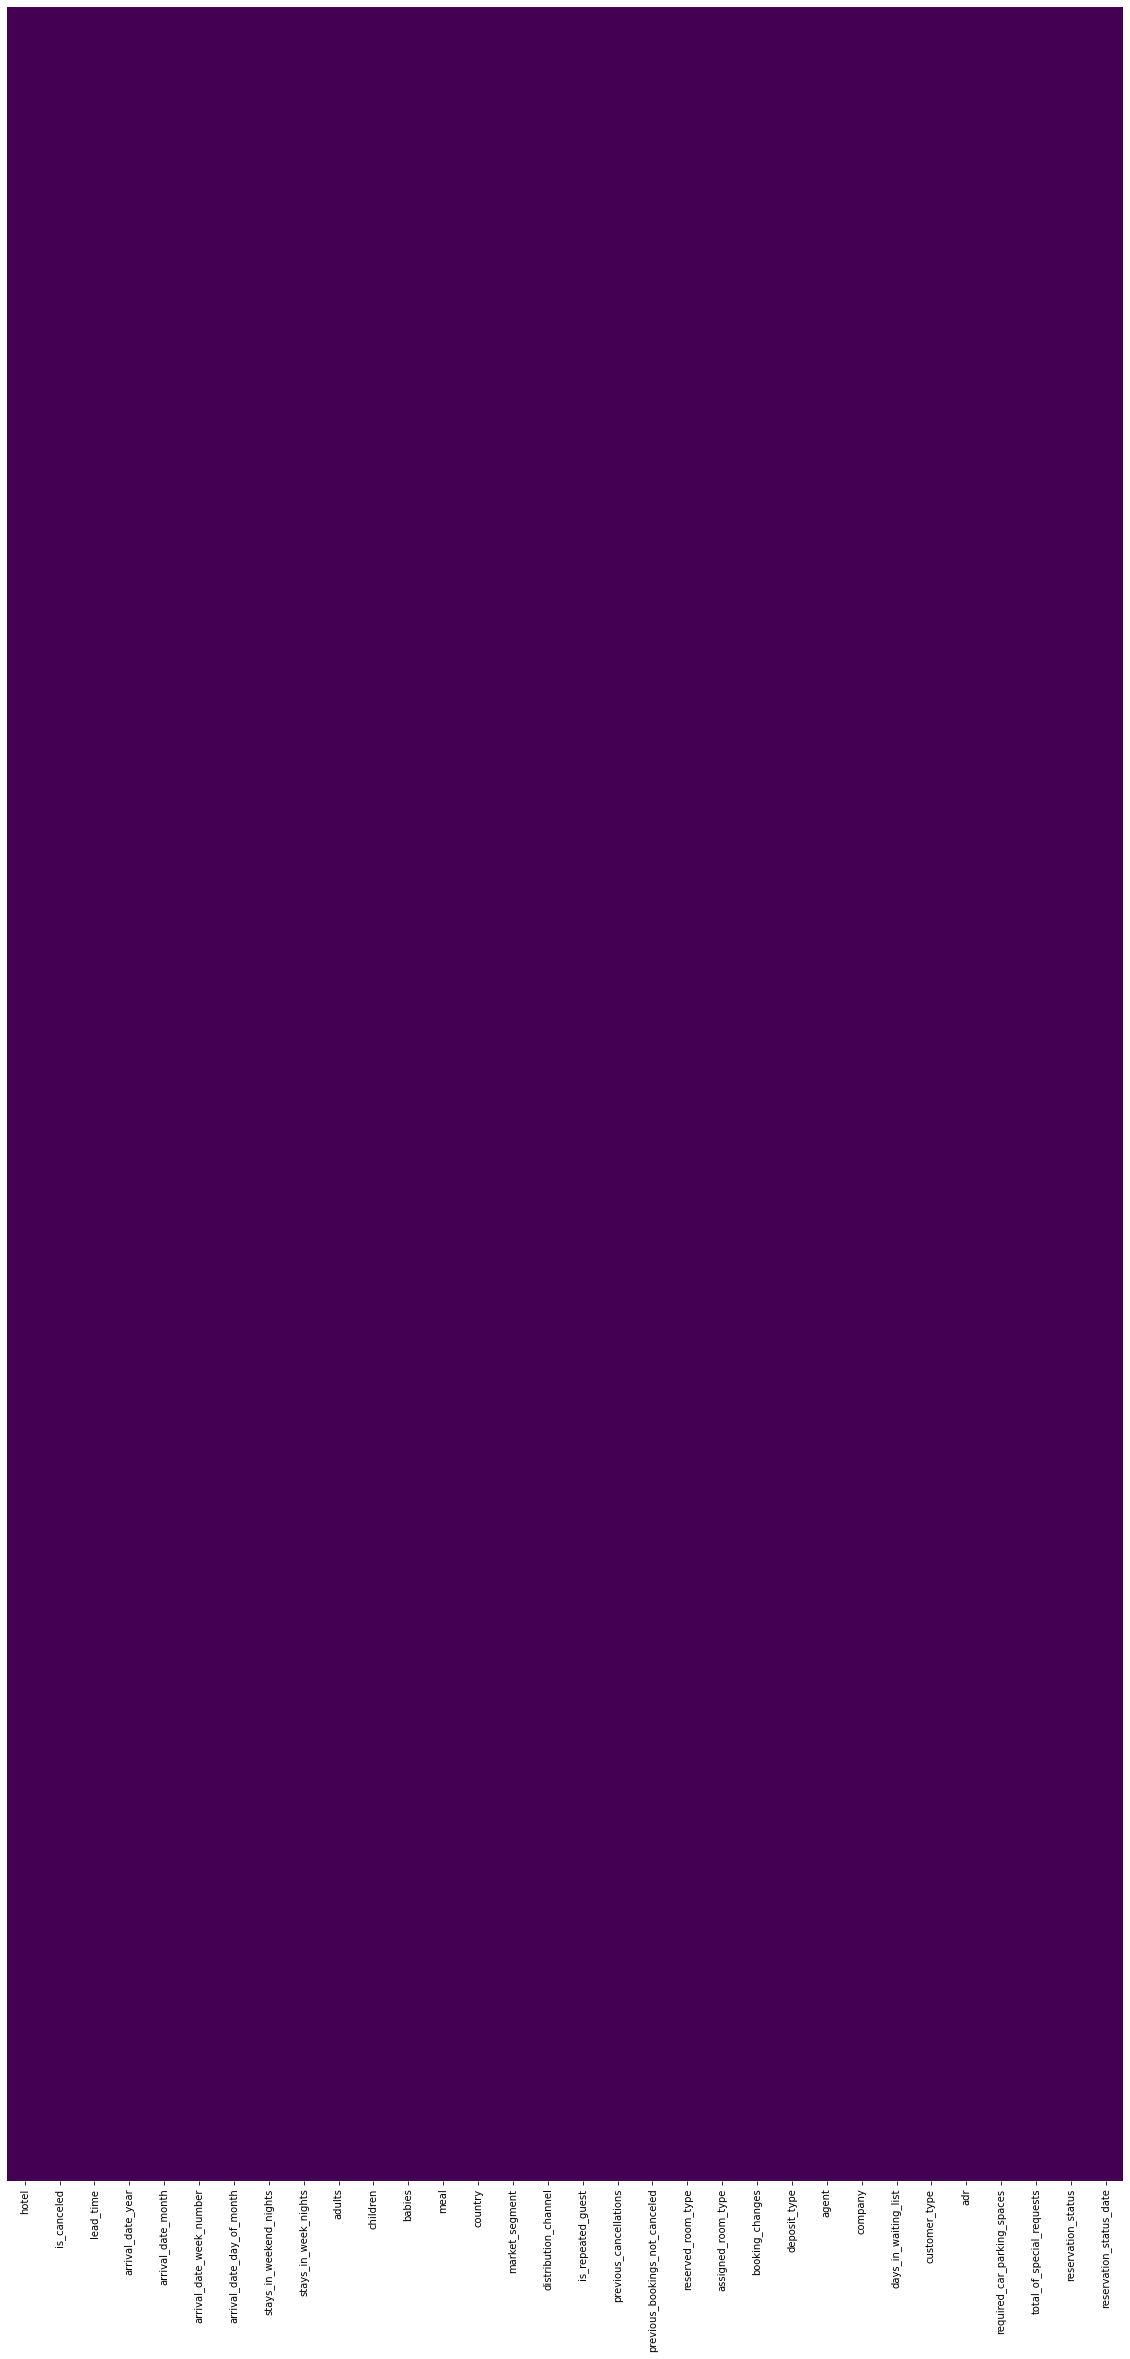

In [ ]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,40)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем пропуски
plt.show() # Отображаем график

### Задание 4
*(2 балла)*

Необходимо посмотреть, сколько всего записей есть в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц каждого года.

**Подсказка**: примените метод groupby для столбцов 'hotel', 'arrival_date_year', 'arrival_date_month'

**Решение:**

In [ ]:
df.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'])['is_canceled'].count()

hotel         arrival_date_year  arrival_date_month
City Hotel    2015.0             August                1235
                                 December               829
                                 July                   703
                                 November               617
                                 October               1696
                                 September             1767
              2016.0             April                 1781
                                 August                1689
                                 December              1242
                                 February              1179
                                 January                683
                                 July                  1560
                                 June                  1962
                                 March                 1529
                                 May                   1846
                                 November       

### Задание 5
*(2 балла)*

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Сохраните получившийся DataFrame в одном файле.

**Решение:**

In [ ]:
print('Число строк: ', df.shape[0])
print('Число столбцов: ', df.shape[1])

df.to_csv('data.csv')

Число строк:  59695
Число столбцов:  32
